In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
import pandas as pd

In [6]:
rohdaten = np.load("I:/Daten/FH BI Maschinenbau/Bachelor Thesis/Crawler Code/Q-Learning/Observations/observations.npy")

In [7]:
df = pd.DataFrame(rohdaten, columns = [
't', 
'actionIndex', 
'reward', 
'totalReward', 
'epsilon', 
'Crawler.lastDistance',
'deltaDistance', 
'oldQValue', 
'temporalDifference',
'newQValue', 
'servoArmOldState', 
'Crawler.servoArmCurrentAngle', 
'servoArmNewState', 
'servoHandOldState',
'Crawler.servoHandCurrentAngle', 
'servoHandNewState', 
'Crawler.servoArmNumberOfStates', 
'Crawler.servoHandNumberOfStates',
'numActions', 
'discountFactor', 
'learningRate'])

In [8]:
df.head()

,t,actionIndex,reward,totalReward,epsilon,Crawler.lastDistance,deltaDistance,oldQValue,temporalDifference,newQValue,...,Crawler.servoArmCurrentAngle,servoArmNewState,servoHandOldState,Crawler.servoHandCurrentAngle,servoHandNewState,Crawler.servoArmNumberOfStates,Crawler.servoHandNumberOfStates,numActions,discountFactor,learningRate
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   t                                20 non-null     float64
 1   actionIndex                      20 non-null     float64
 2   reward                           20 non-null     float64
 3   totalReward                      20 non-null     float64
 4   epsilon                          20 non-null     float64
 5   Crawler.lastDistance             20 non-null     float64
 6   deltaDistance                    20 non-null     float64
 7   oldQValue                        20 non-null     float64
 8   temporalDifference               20 non-null     float64
 9   newQValue                        20 non-null     float64
 10  servoArmOldState                 20 non-null     float64
 11  Crawler.servoArmCurrentAngle     20 non-null     float64
 12  servoArmNewState        

In [11]:
df.describe()

,t,actionIndex,reward,totalReward,epsilon,Crawler.lastDistance,deltaDistance,oldQValue,temporalDifference,newQValue,...,Crawler.servoArmCurrentAngle,servoArmNewState,servoHandOldState,Crawler.servoHandCurrentAngle,servoHandNewState,Crawler.servoArmNumberOfStates,Crawler.servoHandNumberOfStates,numActions,discountFactor,learningRate
count,20.000000,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,...,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.950000,0.0,-1.512885,0.727820,0.000253,4.639651,-0.075644,0.600000,-2.067885,-1.261097,...,7.65000,0.100000,0.050000,4.200000,0.050000,0.200000,0.200000,0.200000,0.045000,0.045000
std,4.248529,0.0,6.765828,3.254912,0.001132,20.749148,0.338291,2.683282,9.247863,5.639795,...,34.21184,0.447214,0.223607,18.782971,0.223607,0.894427,0.894427,0.894427,0.201246,0.201246
min,0.000000,0.0,-30.257702,0.000000,0.000000,0.000000,-1.512885,0.000000,-41.357702,-25.221932,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,19.000000,0.0,0.000000,14.556408,0.005062,92.793012,0.000000,12.000000,0.000000,0.000000,...,153.00000,2.000000,1.000000,84.000000,1.000000,4.000000,4.000000,4.000000,0.900000,0.900000


<function matplotlib.pyplot.show(close=None, block=None)>

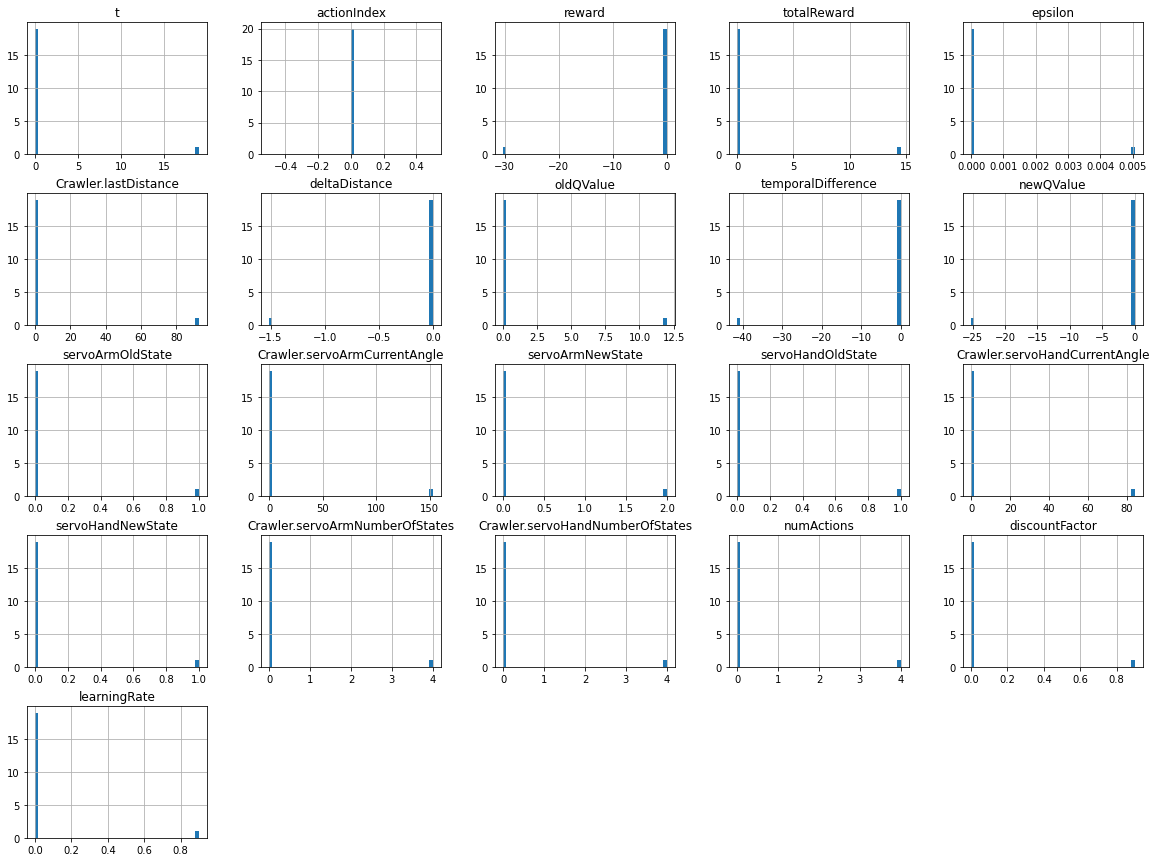

In [12]:
%matplotlib inline
df.hist(bins=50, figsize=(20,15))
plt.show

<AxesSubplot:xlabel='t'>

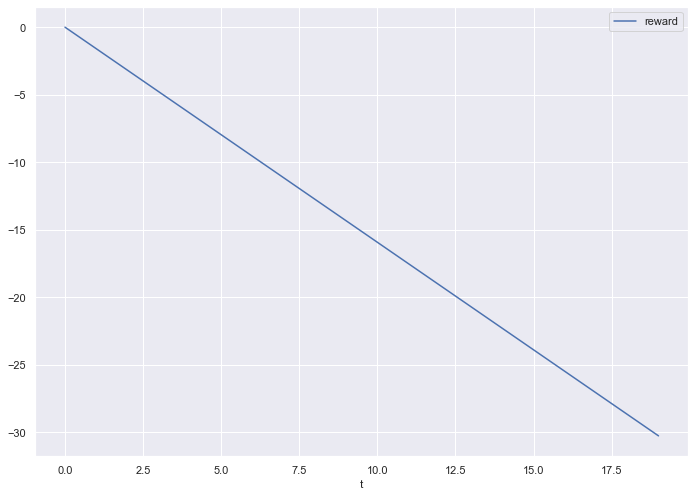

In [23]:
df.plot(kind="line", x="t", y="reward")

<AxesSubplot:xlabel='t', ylabel='actionIndex'>

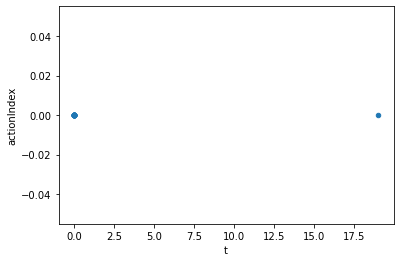

In [17]:
df.plot(kind="scatter", x="t", y="actionIndex")

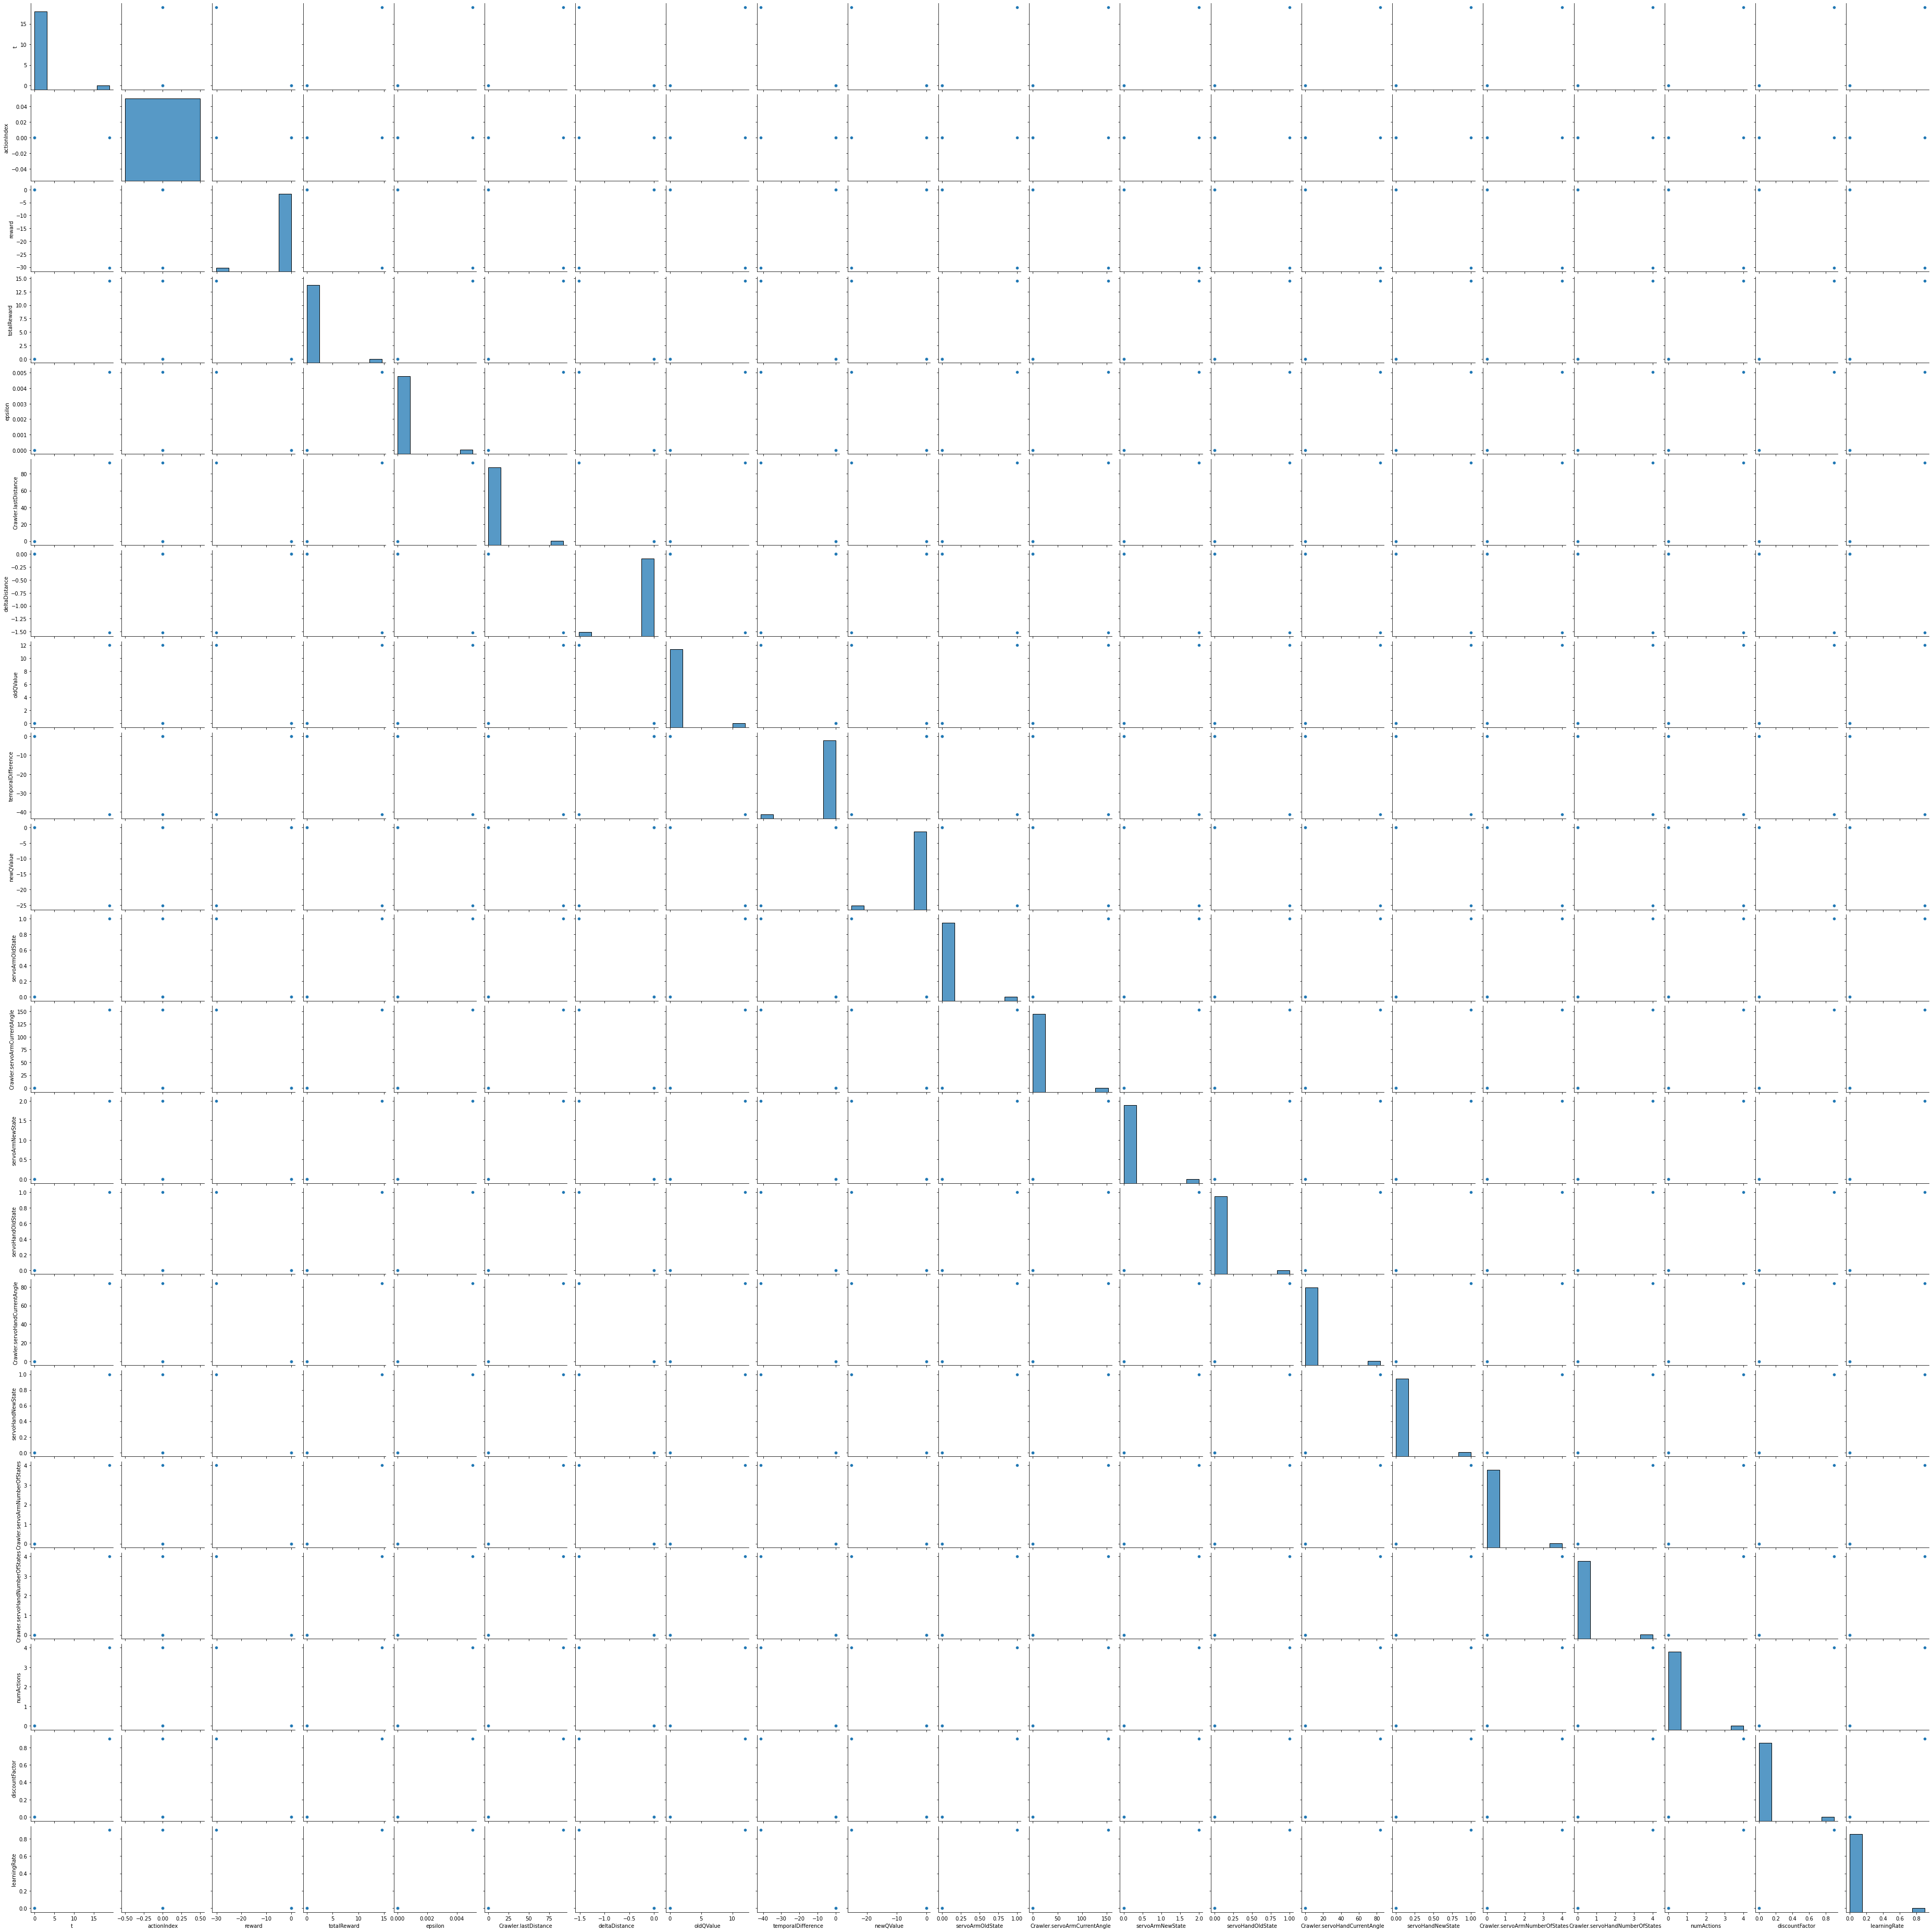

In [18]:
import seaborn as sns
sns.pairplot(df)
plt.show()

<AxesSubplot:>

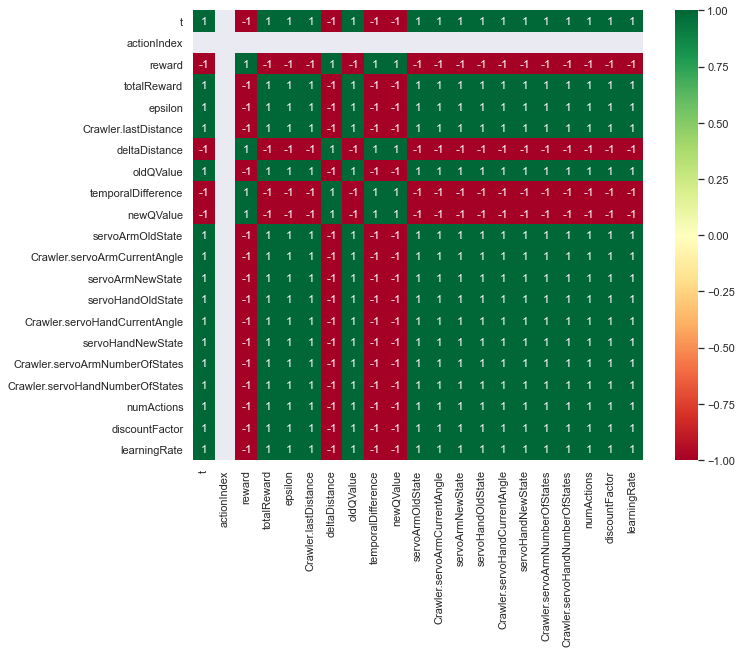

In [19]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(df.corr().round(2), square=True, cmap='RdYlGn', annot=True)


<AxesSubplot:xlabel='t', ylabel='totalReward'>

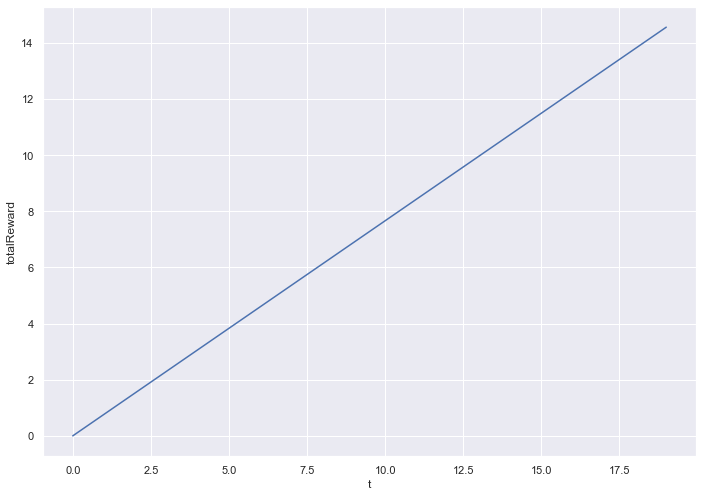

In [21]:
import seaborn as sns
sns.lineplot(x="t", y="totalReward", data=df)

<AxesSubplot:xlabel='t', ylabel='reward'>

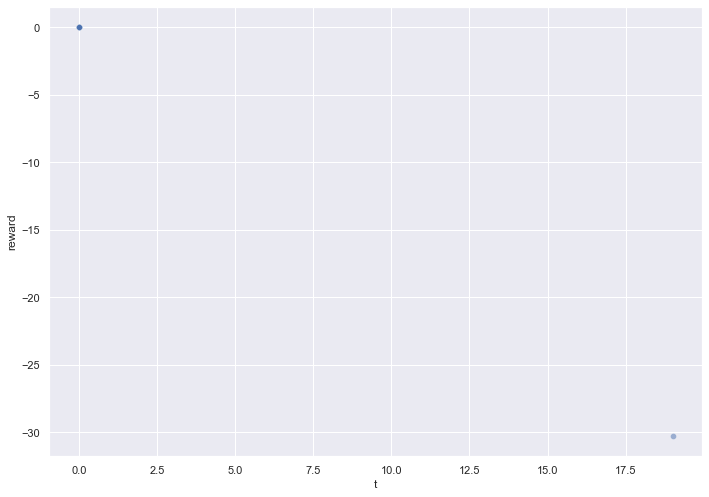

In [22]:
import seaborn as sns
sns.scatterplot(x="t", y="reward", data=df, alpha=0.5)

In [76]:
rohdaten_single_last_qtable = np.load("I:/Messwerte/qtables/499-qtable.npy")

In [77]:
df = pd.DataFrame(rohdaten_single_last_qtable)

ValueError: Must pass 2-d input